In [252]:

import pandas as pd
import numpy as np
# pd.set_option()
import matplotlib.pyplot as plt


pd.set_option('display.max_columns',50)

train = pd.read_csv('./Data/Yes_ml2_train.csv')

# print(train.shape,'\n')
# print(train.info(),'\n')
# print(train.describe().T,'\n')
# print(train.head(20),'\n')
# print(train.tail(20),'\n')

In [254]:
# np.log?
train = train[['Serial Number','2012 Deposits', '2013 Deposits', '2014 Deposits',
       '2015 Deposits', '2016 Deposits']]

In [264]:
# train= train.replace(0,np.nan)
train=train.dropna()
# df=df.replace(nan,0)

In [265]:
train.isnull().sum()

Serial Number    0
2012 Deposits    0
2013 Deposits    0
2014 Deposits    0
2015 Deposits    0
2016 Deposits    0
dtype: int64

In [106]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
Serial Number,3790.0,1.895500e+03,1.094223e+03,1.000000,948.250000,1895.500000,2842.750000,3.790000e+03
Main Office,3790.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Branch Number,3790.0,5.390806e+03,1.549105e+03,2866.000000,4062.250000,5256.500000,6858.250000,7.989000e+03
2010 Deposits,3050.0,1.122134e+05,2.797591e+06,0.000000,18932.000000,35628.000000,66072.750000,1.535773e+08
2011 Deposits,3212.0,1.255136e+05,3.447382e+06,0.000000,20132.750000,37183.000000,66947.000000,1.943880e+08
2012 Deposits,3461.0,1.289202e+05,3.547146e+06,0.000000,21065.000000,39744.000000,71496.000000,2.073680e+08
2013 Deposits,3615.0,1.363828e+05,3.740357e+06,0.000000,23314.500000,42358.000000,76352.500000,2.233954e+08
2014 Deposits,3734.0,1.455916e+05,3.980277e+06,0.000000,26239.000000,46772.000000,83296.500000,2.415406e+08
2015 Deposits,3771.0,1.576281e+05,4.281414e+06,0.000000,30881.000000,52516.000000,91566.000000,2.612928e+08
2016 Deposits,3790.0,1.832558e+05,5.116119e+06,0.000000,37091.500000,60753.000000,104378.250000,3.136869e+08


In [111]:
# temp_2010 = np.log(train[train['2010 Deposits'].notnull()]['2010 Deposits'])
# type(temp_2010)
temp_2010.describe()

count    3050.000000
mean            -inf
std              NaN
min             -inf
25%         9.848609
50%        10.480887
75%        11.098511
max        18.849715
Name: 2010 Deposits, dtype: float64

In [115]:
train.isnull().sum()

Serial Number          0
Main Office            0
Branch Number          0
Established Date       0
Acquired Date       1493
City                   0
County                 0
State                  0
2010 Deposits        740
2011 Deposits        578
2012 Deposits        329
2013 Deposits        175
2014 Deposits         56
2015 Deposits         19
2016 Deposits          0
log_2015               0
log_2014               0
log_2010               0
log_2011               0
log_2012               0
log_2013               0
dtype: int64

###  Understadning the distributions and performing Transformations

In [10]:
len(train['Established Date'].unique())

2027

In [11]:
import seaborn as sns


In [49]:

train['log_2014'] = np.log(train['2014 Deposits'])
train[train['log_2014'].notnull()]['log_2014'].describe()
# train['log_2015'].isnull().sum()

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


count    3734.000000
mean            -inf
std              NaN
min             -inf
25%        10.175002
50%        10.753040
75%        11.330162
max        19.302548
Name: log_2014, dtype: float64

In [50]:
from sklearn.preprocessing import Imputer
median_imputer = Imputer(strategy='median')
train['log_2014']  = median_imputer.fit_transform(train[['log_2014']]).ravel()
# train['log_2015'].impute('mean')
train['log_2014'].describe()

count    3790.000000
mean            -inf
std              NaN
min             -inf
25%        10.185456
50%        10.753040
75%        11.324147
max        19.302548
Name: log_2014, dtype: float64

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


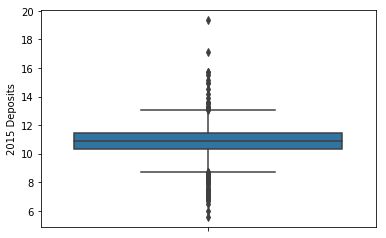

In [224]:
sns.boxplot(y= np.log(train['2015 Deposits']))

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


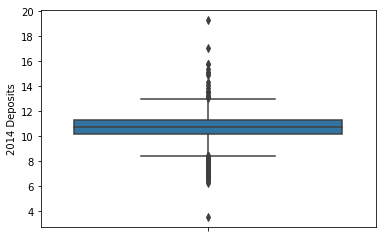

In [48]:
sns.boxplot(y= np.log(train['2014 Deposits']))

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


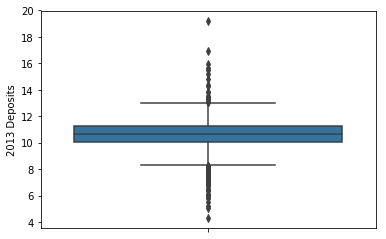

In [225]:
sns.boxplot(y= np.log(train['2013 Deposits']))

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


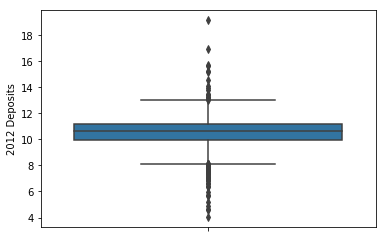

In [226]:
sns.boxplot(y= np.log(train['2012 Deposits']))

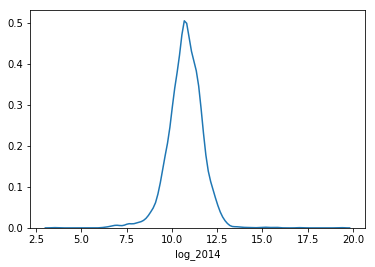

In [51]:
# sns.distplot(np.log(train[train['2015 Deposits'].notnull()]['2015 Deposits']),hist=False)
sns.distplot(train['log_2014'],hist=False)
# sns.distplot(train['2014 Deposits'],hist=False)
# sns.distplot(train['2015 Deposits'])#,hist=False)

In [60]:
# plt.hist(train['log_2014'])

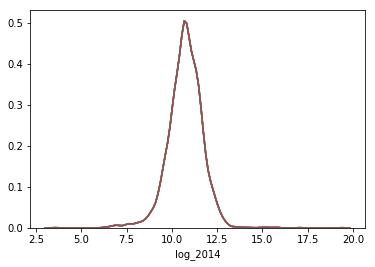

In [53]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(sns.distplot(train['log_2014'],hist=False),2, 3, i)
#     ax.text(0.5, 0.5, str((2, 3, i)),
#            fontsize=18, ha='center')

In [116]:
train.columns


Index(['Serial Number', 'Main Office', 'Branch Number', 'Established Date',
       'Acquired Date', 'City', 'County', 'State', '2010 Deposits',
       '2011 Deposits', '2012 Deposits', '2013 Deposits', '2014 Deposits',
       '2015 Deposits', '2016 Deposits', 'log_2015', 'log_2014', 'log_2010',
       'log_2011', 'log_2012', 'log_2013'],
      dtype='object')

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


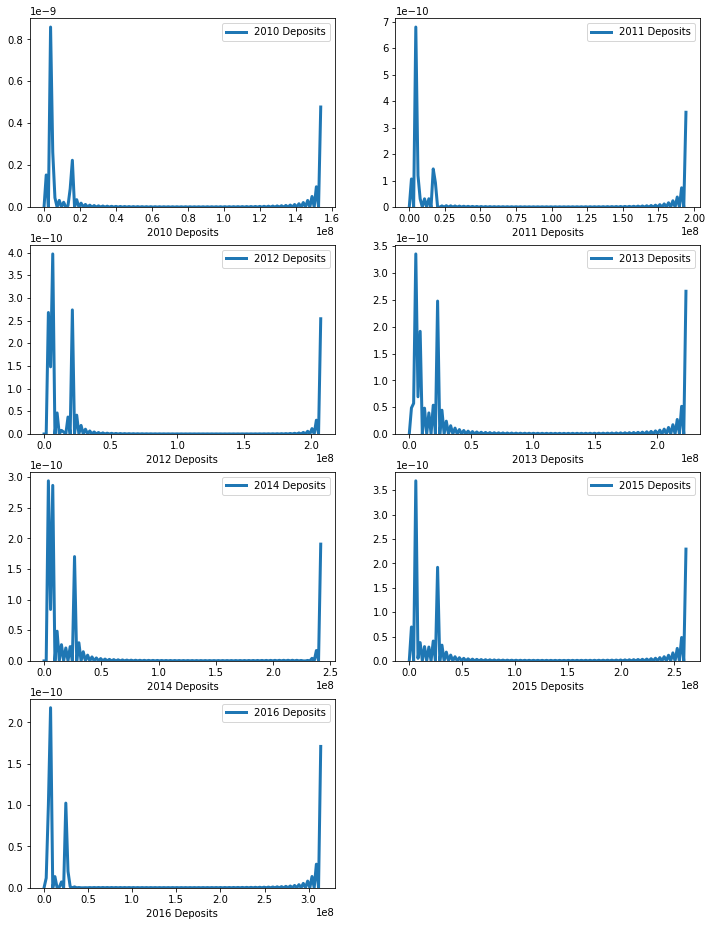

In [96]:
deposits = ['2010 Deposits',
       '2011 Deposits', '2012 Deposits', '2013 Deposits', '2014 Deposits',
       '2015 Deposits', '2016 Deposits']
plt.figure(figsize=(12,16))
for i, deposit in enumerate(deposits):
    ax = plt.subplot(4, 2, i + 1)
    
    # Draw the density plot
    sns.distplot(train[deposit], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = deposit)
    
# Plot formatting
# plt.legend(prop={'size': 8}, title = 'Deposits')
# plt.title('Density Plot with Multiple Airlines')
# plt.xlabel('Deposit Values')
# plt.ylabel('Density')

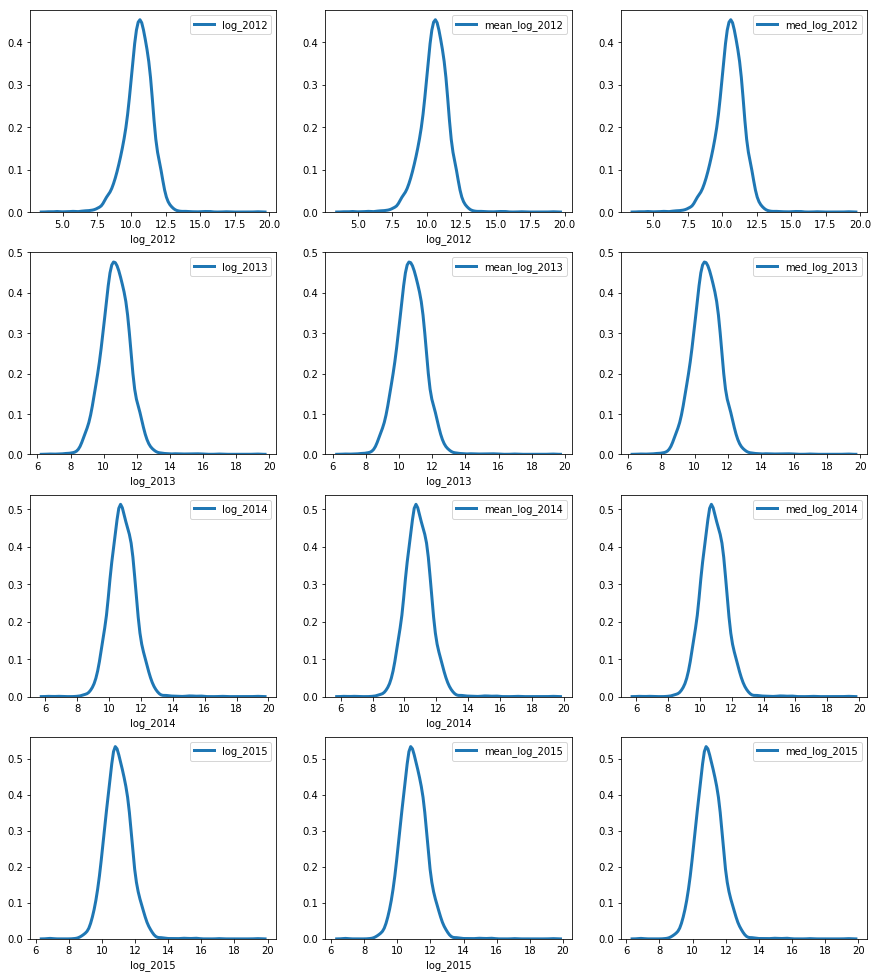

In [269]:
deposits = ['2012 Deposits', '2013 Deposits', '2014 Deposits',
       '2015 Deposits']
mean_imputer = Imputer()
plt.figure(figsize=(15,26))
for i, deposit in enumerate(deposits):
    year, _ = deposit.split()
    mean_imputed = mean_imputer.fit_transform(train[[deposit]]).ravel()
    med_imputed = median_imputer.fit_transform(train[[deposit]]).ravel()

    

    
    train['log_'+year] = np.log(train[deposit])
    ax = plt.subplot(6, 3, 3*i + 1)
    
    # Draw the density plot
    sns.distplot(train['log_'+year], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'log_'+year)
    
    ax = plt.subplot(6, 3, 3*i + 2)

#     train['log_'+year]  mean_imputed
#     mean_imputed = mean_imputer.fit_transform(train[['log_'+year]]).ravel()
    train['log_'+year] = np.log(mean_imputed)
    sns.distplot(train['log_'+year] , hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'mean_log_'+year)

    
    ax = plt.subplot(6, 3, 3*i + 3)

#     train['log_'+year]
#     med_imputed = median_imputer.fit_transform(train[['log_'+year]]).ravel()
    med_imputed = np.log(med_imputed)
    sns.distplot(med_imputed , hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'med_log_'+year)
    
    
    
#     ax = plt.subplot(6, 2, 2*i + 2)
#     sns.boxplot(y= train['log_'+year])#,ylabel = deposit)
    
    
# Plot formatting
# plt.legend(prop={'size': 8}, title = 'Deposits')
    

    

# train['log_2014'] = np.log(train['2014 Deposits'])
# train[train['log_2014'].notnull()]['log_2014'].describe()

In [232]:
deposits = ['2010 Deposits']
# ,
#        '2011 Deposits', '2012 Deposits', '2013 Deposits', '2014 Deposits',
#        '2015 Deposits']

for deposit in deposits:
    train[deposit] = train[deposit].where(train[deposit] <=0, 1)
# train.where(train[])

In [239]:
train['2010 Deposits'] = train['2010 Deposits'].replace(0,1)

In [241]:
train['log_2010'] = np.log(train['2010 Deposits'])

In [242]:
train['log_2010'].describe()

count    3790.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: log_2010, dtype: float64

In [268]:
# train['2012 Deposits'].apply(lambad x: x<=0)
train[train['2012 Deposits'] <=0].count()

Serial Number    0
2012 Deposits    0
2013 Deposits    0
2014 Deposits    0
2015 Deposits    0
2016 Deposits    0
dtype: int64

In [228]:
train['log_2012'].describe()

count    3461.000000
mean            -inf
std              NaN
min             -inf
25%         9.955368
50%        10.590214
75%        11.177397
max        19.150005
Name: log_2012, dtype: float64

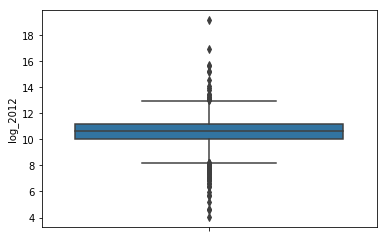

In [291]:
sns.boxplot(y= train['log_2012'])

#### Outlier treatement

In [292]:
train.columns

Index(['Serial Number', '2012 Deposits', '2013 Deposits', '2014 Deposits',
       '2015 Deposits', '2016 Deposits', 'log_2012', 'log_2013', 'log_2014',
       'log_2015'],
      dtype='object')

In [293]:
train['log_2012'].describe()

count    3411.000000
mean       10.539072
std         1.021848
min         4.007333
25%         9.984676
50%        10.605272
75%        11.186128
max        19.150005
Name: log_2012, dtype: float64

In [314]:
train.shape

(3097, 10)

In [305]:
iqr = train.log_2012.quantile(0.75) - train.log_2012.quantile(0.25)
print(iqr)
start = train.log_2012.quantile(0.25) - 1.5*iqr
end = train.log_2012.quantile(0.75) + 1.5*iqr
print(start)
print(end)

1.201452522324006
8.182496967595377
12.9883070568914


In [311]:
# train.loc[(start < train.log_2012) & (train.log_2012< end)]

In [313]:
logs= ['log_2015', 'log_2014', 'log_2012', 'log_2013']

for log in logs :
    iqr = train[log].quantile(0.75) - train[log].quantile(0.25)
# print(iqr)
    start = train[log].quantile(0.25) - 1.5*iqr
    end = train[log].quantile(0.75) + 1.5*iqr
# print(start)
# print(end)
    train = train.loc[(start < train[log]) & (train[log]< end)]    

In [316]:
train_select = train[['log_2012','log_2013', 'log_2014',  'log_2015', '2016 Deposits']]
#  ,'log_2010','log_2011', 'log_2012'

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [317]:
target = train_select['2016 Deposits']
predictors = train_select.drop(['2016 Deposits'],axis=1)

In [138]:
# -np.inf

# predictors.replace(-np.inf, 0, inplace=True)

# predictors.count(axis=0,numeric_only=True)
# predictors.where(lambda x: x in [np.inf, -np.inf])
lapply?

Object `lapply` not found.


In [193]:
predictors = predictors.replace(-np.inf, 0.0)


In [184]:
predictors = predictors.replace(-np.inf, np.nan)


In [318]:
predictors.isnull().sum()

log_2012    0
log_2013    0
log_2014    0
log_2015    0
dtype: int64

In [186]:
predictors['log_2012'] = mean_imputer.fit_transform(predictors[['log_2012']]).ravel()
predictors['log_2013'] = mean_imputer.fit_transform(predictors[['log_2013']]).ravel()

predictors['log_2014'] = mean_imputer.fit_transform(predictors[['log_2014']]).ravel()
predictors['log_2015'] = mean_imputer.fit_transform(predictors[['log_2015']]).ravel()

In [273]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, train_size=0.8,test_size=0.2, random_state=7)


In [319]:
from sklearn import linear_model, svm, tree, ensemble

models = [
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.Lasso(),
    linear_model.ElasticNet(),
    linear_model.BayesianRidge(),
#     linear_model.RANSACRegressor(),
    svm.LinearSVR(),
    svm.SVR(),
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),
    ensemble.RandomForestRegressor(),
    ensemble.GradientBoostingRegressor()

]

In [320]:
for model in models:
    model.fit(X_train,Y_train)
    print('-'*40)
    print(model.__class__.__name__)
    
    train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(Y_train, train_pred))
    print("Root mean square error train {}".format(train_rmse))    

    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, pred))
    print("Root mean square error test {}".format(rmse))

----------------------------------------
LinearRegression
Root mean square error train 232611.4233854214
Root mean square error test 11979701.253424268
----------------------------------------
Ridge
Root mean square error train 232611.5839691801
Root mean square error test 11979740.784196852
----------------------------------------
Lasso
Root mean square error train 232611.42350207907
Root mean square error test 11979702.110209186
----------------------------------------
ElasticNet
Root mean square error train 237076.5519671467
Root mean square error test 11994199.115795104
----------------------------------------
BayesianRidge
Root mean square error train 232616.4046438305
Root mean square error test 11979944.818431804
----------------------------------------
LinearSVR
Root mean square error train 269544.74434151466
Root mean square error test 12038456.937655816
----------------------------------------
SVR
Root mean square error train 271897.84064766904
Root mean square error test 120

###  Getting the result for test set

In [340]:
test = pd.read_csv('./Data/Yes_ml2_test.csv')

In [341]:
test.isnull().sum()

Serial Numer          0
Main Office           0
Branch Number         0
Established Date      0
Acquired Date       122
City                  0
County                0
State                 0
2010 Deposits         0
2011 Deposits         0
2012 Deposits         0
2013 Deposits         0
2014 Deposits         0
2015 Deposits         0
dtype: int64

In [342]:
test = test[ ['Serial Numer','2012 Deposits', '2013 Deposits', '2014 Deposits',
       '2015 Deposits']]
# mean_imputer = Impute

In [343]:
test=  test.replace(0,1)
# test=test.dropna()

In [344]:
deposits = [ '2012 Deposits', '2013 Deposits', '2014 Deposits',
       '2015 Deposits']
# mean_imputer = Imputer()   '2010 Deposits','2011 Deposits',
# plt.figure(figsize=(15,26))
for i, deposit in enumerate(deposits):
    year, _ = deposit.split()
#     mean_imputed = mean_imputer.fit_transform(train[[deposit]]).ravel()
#     med_imputed = median_imputer.fit_transform(train[[deposit]]).ravel()

    

    
    test['log_'+year] = np.log(test[deposit])

In [345]:
serial_numer = pd.DataFrame(test['Serial Numer'])
test = test[['log_2012','log_2013', 'log_2014',  'log_2015']]


In [337]:
test = test.replace(-np.inf, 0)

In [208]:
test = test.replace(-np.inf, np.nan)
# 

In [346]:
test.isnull().sum()

log_2012    0
log_2013    0
log_2014    0
log_2015    0
dtype: int64

In [286]:
test_pred = models[0].predict(test)

In [287]:
result = pd.concat([serial_numer['Serial Numer'],pd.Series(test_pred, name='Deposits 2016')], axis =1,)

In [288]:
pd.DataFrame.to_csv(result,path_or_buf='./output/resultsML2_yes_11.csv',index=False)

In [348]:
for i in range(11):
    test_pred = models[i].predict(test)   
    result = pd.concat([serial_numer['Serial Numer'],pd.Series(test_pred, name='Deposits 2016')], axis =1,)
    pd.DataFrame.to_csv(result,path_or_buf='./output/resultsML2_yes_{}.csv'.format(i),index=False)    
    
    

In [28]:
test['investment'] = test['investment'].replace(np.nan, 'MISSING')

In [29]:
test['size'] = test['size'].replace(np.nan, 'MISSING_size')

In [30]:
investment_encod = pd.get_dummies(test['investment'])
test = test.join(investment_encod)

size_encod = pd.get_dummies(test['size'])
test = test.join(size_encod)

In [31]:
# choose variable mean_annula_3y or standard_deviation_3y with mean/median imputation
# choose sharpe_ratio_3y with mena or median imputation

mean_imputer = Imputer()
median_imputer = Imputer(strategy='median')
test['standard_deviation_3y']  = median_imputer.fit_transform(test[['standard_deviation_3y']]).ravel()
test['sharpe_ratio_3y']  = median_imputer.fit_transform(test[['sharpe_ratio_3y']]).ravel()

# use returns_15 and returns_17 with mean imputations


test['returns_2015']  = mean_imputer.fit_transform(test[['returns_2015']]).ravel()
test['returns_2017']  = mean_imputer.fit_transform(test[['returns_2017']]).ravel()

In [32]:
test['net_annual_expenses_ratio'] = test['net_annual_expenses']

In [33]:
test = test[['total_net_assets','net_annual_expenses_ratio', 'morningstar_rating','portfolio_cash', 'portfolio_stocks', 'portfolio_bonds',
       'portfolio_others', 'portfolio_preferred', 'portfolio_convertable',
       'sectors_basic_materials', 'sectors_consumer_cyclical',
       'sectors_financial_services', 'sectors_real_estate',
       'sectors_consumer_defensive', 'sectors_healthcare', 'sectors_utilities',
       'sectors_communication_services', 'sectors_energy',
       'sectors_industrials', 'sectors_technology', 'price_earning','returns_ytd', 'returns_2017',
       'returns_2015','morningstar_risk_rating',
        'standard_deviation_3y', 'sharpe_ratio_3y',
       'MISSING_size', 'Medium', 'Small']]

In [34]:
test  = mean_imputer.fit_transform(test)

In [35]:
test_pred = models[-3].predict(test)

In [36]:
test_sub = pd.read_csv('./Data/Yes_Bank_Test_Data.csv')

In [37]:
test_sub.shape

(7621, 48)

In [38]:
result = pd.concat([test_sub['Serial Number'],pd.Series(test_pred, name='bonds_aaa')], axis =1,)


In [39]:
pd.DataFrame.to_csv(result,path_or_buf='./output/results_yes_3_4.csv',index=False)

In [2]:
train = train[train['returns_ytd'].notnull()]

In [3]:
train = train[train['portfolio_bonds'].notnull()]


In [4]:
train['bonds_aaa'].isnull().sum()

0

In [5]:
train['bonds_aaa'].describe()

count    17654.000000
mean        12.512602
std         23.696518
min         -7.600000
25%          0.000000
50%          0.000000
75%         13.310000
max        104.170000
Name: bonds_aaa, dtype: float64

In [6]:
train['bonds_aa'].describe()

count    17654.000000
mean         4.548923
std         12.366100
min        -11.460000
25%          0.000000
50%          0.000000
75%          2.585000
max        177.170000
Name: bonds_aa, dtype: float64

In [7]:
train['net_annual_expenses_ratio'].describe()

count    17642.000000
mean         1.028833
std          0.623832
min          0.000000
25%          0.630000
50%          0.970000
75%          1.370000
max         19.100000
Name: net_annual_expenses_ratio, dtype: float64

In [8]:
train['bonds_aaa'].isnull().sum()

0

### 2 Data exploration and missing value treatment

In [9]:
import seaborn as sns
import numpy as np

In [10]:
train['investment'] = train['investment'].replace(np.nan, 'MISSING')

In [11]:
train['size'] = train['size'].replace(np.nan, 'MISSING_size')

In [12]:
from sklearn.preprocessing import Imputer

#### 2.1 Handelling the categorical variables -- Sum and investment

In [13]:
investment_encod = pd.get_dummies(train['investment'])
train = train.join(investment_encod)
# print(train.describe())

In [14]:
investment_encod = pd.get_dummies(train['size'])
train = train.join(investment_encod)
# print(train.describe())

In [15]:
train.isnull().sum()

Serial Number                        0
fund_symbol                          0
fund_name                            0
category                             0
fund_family                          0
investment                           0
size                                 0
total_net_assets                     0
currency                             0
net_annual_expenses_ratio           12
morningstar_rating                   0
inception_date                       0
portfolio_cash                       0
portfolio_stocks                     0
portfolio_bonds                      0
portfolio_others                     0
portfolio_preferred                  0
portfolio_convertable                0
sectors_basic_materials              0
sectors_consumer_cyclical            0
sectors_financial_services           0
sectors_real_estate                  0
sectors_consumer_defensive           0
sectors_healthcare                   0
sectors_utilities                    0
sectors_communication_ser

#### 2.2 Performing Imputations - for selected features


In [16]:
# choose variable mean_annula_3y or standard_deviation_3y with mean/median imputation
# choose sharpe_ratio_3y with mena or median imputation

mean_imputer = Imputer()
median_imputer = Imputer(strategy='median')
train['standard_deviation_3y']  = median_imputer.fit_transform(train[['standard_deviation_3y']]).ravel()
train['sharpe_ratio_3y']  = median_imputer.fit_transform(train[['sharpe_ratio_3y']]).ravel()

# use returns_15 and returns_17 with mean imputations


train['returns_2015']  = mean_imputer.fit_transform(train[['returns_2015']]).ravel()
train['returns_2017']  = mean_imputer.fit_transform(train[['returns_2017']]).ravel()

#### Selecting the feature to build the model

In [17]:
train_select = train[['total_net_assets','net_annual_expenses_ratio', 'morningstar_rating','portfolio_cash', 'portfolio_stocks', 'portfolio_bonds',
       'portfolio_others', 'portfolio_preferred', 'portfolio_convertable',
        'bonds_aaa',
       'sectors_basic_materials', 'sectors_consumer_cyclical',
       'sectors_financial_services', 'sectors_real_estate',
       'sectors_consumer_defensive', 'sectors_healthcare', 'sectors_utilities',
       'sectors_communication_services', 'sectors_energy',
       'sectors_industrials', 'sectors_technology', 'price_earning','returns_ytd', 'returns_2017',
       'returns_2015','morningstar_risk_rating',
        'standard_deviation_3y', 'sharpe_ratio_3y',
       'MISSING_size', 'Medium', 'Small']]
# 'Blend', 'Growth', 'MISSING', 'Value', 'Large',

#### Comparing different Regression algorithms

In [18]:
from sklearn.model_selection import train_test_split

target = train_select['bonds_aaa']
predictors = train_select.drop(['bonds_aaa'],axis=1)

In [19]:
predictors = median_imputer.fit_transform(predictors)

In [20]:
target = median_imputer.fit_transform(train[['bonds_aaa']]).ravel()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, train_size=0.8,test_size=0.2, random_state=7)


In [23]:
from sklearn import linear_model, svm, tree, ensemble

models = [
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.Lasso(),
    linear_model.ElasticNet(),
    linear_model.BayesianRidge(),
#     linear_model.RANSACRegressor(),
    svm.LinearSVR(),
    svm.SVR(),
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),
    ensemble.RandomForestRegressor(),
    ensemble.GradientBoostingRegressor()

]

In [24]:
for model in models:
    model.fit(predictors,target)
    print('-'*30)
    print(model.__class__.__name__)
    
    train_pred = model.predict(predictors)
    train_rmse = np.sqrt(mean_squared_error(target, train_pred))
    print("Root mean square error train {}".format(train_rmse))    

    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, pred))
    print("Root mean square error test {}".format(rmse))

------------------------------
LinearRegression
Root mean square error train 19.152215563350005
Root mean square error test 18.520094824362893
------------------------------
Ridge
Root mean square error train 19.152218941545783
Root mean square error test 18.519886909277528


C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.960428e-22
  overwrite_a=True).T


------------------------------
Lasso
Root mean square error train 20.468657699488862
Root mean square error test 19.626710657679723
------------------------------
ElasticNet
Root mean square error train 20.520837025374224
Root mean square error test 19.666556808849574
------------------------------
BayesianRidge
Root mean square error train 19.15244185027426
Root mean square error test 18.518579682420587
------------------------------
LinearSVR
Root mean square error train 761247.4590919425
Root mean square error test 629254.368469513
------------------------------
SVR
Root mean square error train 24.015482832611983
Root mean square error test 22.72567642408247
------------------------------
DecisionTreeRegressor
Root mean square error train 1.8000774049971332e-15
Root mean square error test 1.79417246503836e-15
------------------------------
ExtraTreeRegressor
Root mean square error train 1.661901196390451e-15
Root mean square error test 1.6806659122121832e-15
------------------------

### Getting the result for the test data set